In [18]:
import numpy as np
import matplotlib.pyplot as plt
from rrt_star import RRTStarDubins

In [19]:
obstacleList = [
    [-5.6749, 1.20558, 0.521155],
    [-3.42783, -2.3167, 0.620818],
    [2.07, 5.36304, 0.534224],
    [-2.02172, -3.82217, 0.462809],
    [1.09052, -0.990239, 0.644405],
    [-4, 6.92, 0.01],
    [-4, 6.92, 0.01],
    [-3.6, 6.92, 0.01],
    [-3.2, 6.92, 0.01],
    [-2.8, 6.92, 0.01],
    [-2.4, 6.92, 0.01],
    [-2, 6.92, 0.01],
    [-1.6, 6.92, 0.01],
    [-1.2, 6.92, 0.01],
    [-0.8, 6.92, 0.01],
    [-0.4, 6.92, 0.01],
    [0, 6.92, 0.01],
    [0.4, 6.92, 0.01],
    [0.8, 6.92, 0.01],
    [1.2, 6.92, 0.01],
    [1.6, 6.92, 0.01],
    [2, 6.92, 0.01],
    [2.4, 6.92, 0.01],
    [2.8, 6.92, 0.01],
    [3.2, 6.92, 0.01],
    [3.6, 6.92, 0.01],
    [4, 6.92, 0.01],
    [4.2, 6.574, 0.01],
    [4.4, 6.228, 0.01],
    [4.6, 5.882, 0.01],
    [4.8, 5.536, 0.01],
    [5, 5.19, 0.01],
    [5.2, 4.844, 0.01],
    [5.4, 4.498, 0.01],
    [5.6, 4.152, 0.01],
    [5.8, 3.806, 0.01],
    [6, 3.46, 0.01],
    [6.2, 3.114, 0.01],
    [6.4, 2.768, 0.01],
    [6.6, 2.422, 0.01],
    [6.8, 2.076, 0.01],
    [7, 1.73, 0.01],
    [7.2, 1.384, 0.01],
    [7.4, 1.038, 0.01],
    [7.6, 0.692, 0.01],
    [7.8, 0.346, 0.01],
    [8, 0, 0.01],
    [7.8, -0.346, 0.01],
    [7.6, -0.692, 0.01],
    [7.4, -1.038, 0.01],
    [7.2, -1.384, 0.01],
    [7, -1.73, 0.01],
    [6.8, -2.076, 0.01],
    [6.6, -2.422, 0.01],
    [6.4, -2.768, 0.01],
    [6.2, -3.114, 0.01],
    [6, -3.46, 0.01],
    [5.8, -3.806, 0.01],
    [5.6, -4.152, 0.01],
    [5.4, -4.498, 0.01],
    [5.2, -4.844, 0.01],
    [5, -5.19, 0.01],
    [4.8, -5.536, 0.01],
    [4.6, -5.882, 0.01],
    [4.4, -6.228, 0.01],
    [4.2, -6.574, 0.01],
    [4, -6.92, 0.01],
    [3.6, -6.92, 0.01],
    [3.2, -6.92, 0.01],
    [2.8, -6.92, 0.01],
    [2.4, -6.92, 0.01],
    [2, -6.92, 0.01],
    [1.6, -6.92, 0.01],
    [1.2, -6.92, 0.01],
    [0.8, -6.92, 0.01],
    [0.4, -6.92, 0.01],
    [0, -6.92, 0.01],
    [-0.4, -6.92, 0.01],
    [-0.8, -6.92, 0.01],
    [-1.2, -6.92, 0.01],
    [-1.6, -6.92, 0.01],
    [-2, -6.92, 0.01],
    [-2.4, -6.92, 0.01],
    [-2.8, -6.92, 0.01],
    [-3.2, -6.92, 0.01],
    [-3.6, -6.92, 0.01],
    [-4, -6.92, 0.01],
    [-4.2, -6.574, 0.01],
    [-4.4, -6.228, 0.01],
    [-4.6, -5.882, 0.01],
    [-4.8, -5.536, 0.01],
    [-5, -5.19, 0.01],
    [-5.2, -4.844, 0.01],
    [-5.4, -4.498, 0.01],
    [-5.6, -4.152, 0.01],
    [-5.8, -3.806, 0.01],
    [-6, -3.46, 0.01],
    [-6.2, -3.114, 0.01],
    [-6.4, -2.768, 0.01],
    [-6.6, -2.422, 0.01],
    [-6.8, -2.076, 0.01],
    [-7, -1.73, 0.01],
    [-7.2, -1.384, 0.01],
    [-7.4, -1.038, 0.01],
    [-7.6, -0.692, 0.01],
    [-7.8, -0.346, 0.01],
    [-8, 0, 0.01],
    [-7.8, 0.346, 0.01],
    [-7.6, 0.692, 0.01], [-7.4, 1.038, 0.01],
    [-7.2, 1.384, 0.01],
    [-7, 1.73, 0.01],
    [-6.8, 2.076, 0.01],
    [-6.6, 2.422, 0.01],
    [-6.4, 2.768, 0.01],
    [-6.2, 3.114, 0.01],
    [-6, 3.46, 0.01],
    [-5.8, 3.806, 0.01],
    [-5.6, 4.152, 0.01],
    [-5.4, 4.498, 0.01],
    [-5.2, 4.844, 0.01],
    [-5, 5.19, 0.01],
    [-4.8, 5.536, 0.01],
    [-4.6, 5.882, 0.01],
    [-4.4, 6.228, 0.01],
    [-4.2, 6.574, 0.01],
]

In [20]:
obstacleList = np.array(obstacleList)

In [21]:
rnd_min = -10
rnd_max = 10

In [22]:
# Shelfino 0
start = [0, 0, np.deg2rad(0.0)]
goal = [0.18, -6.42, np.deg2rad(-90)]



shelfino0_rrt = RRTStarDubins(start, goal, rand_area=[
                               rnd_min, rnd_max], obstacle_list=obstacleList, robot_radius=0.5)

shelfino0_path = shelfino0_rrt.planning(search_until_max_iter=False)

Iter: 0 , number of nodes: 1
Iter: 1 , number of nodes: 1
Iter: 2 , number of nodes: 1
Iter: 3 , number of nodes: 1
Iter: 4 , number of nodes: 1
Iter: 5 , number of nodes: 1
Iter: 6 , number of nodes: 1
Iter: 7 , number of nodes: 1
Iter: 8 , number of nodes: 1
Iter: 9 , number of nodes: 1
Iter: 10 , number of nodes: 2
Iter: 11 , number of nodes: 2
Iter: 12 , number of nodes: 2
Iter: 13 , number of nodes: 2
Iter: 14 , number of nodes: 2
Iter: 15 , number of nodes: 2
Iter: 16 , number of nodes: 2
Iter: 17 , number of nodes: 2
Iter: 18 , number of nodes: 2
Iter: 19 , number of nodes: 2
Iter: 20 , number of nodes: 2
Iter: 21 , number of nodes: 2
Iter: 22 , number of nodes: 2
Iter: 23 , number of nodes: 2
Iter: 24 , number of nodes: 2
Iter: 25 , number of nodes: 2
Iter: 26 , number of nodes: 2
Iter: 27 , number of nodes: 2
Iter: 28 , number of nodes: 2
Iter: 29 , number of nodes: 2
Iter: 30 , number of nodes: 2
Iter: 31 , number of nodes: 3
Iter: 32 , number of nodes: 3
Iter: 33 , number of

In [23]:
# Shelfino 0
start = [-2, 2, np.deg2rad(0.0)]
goal = [0.18, -6.42, np.deg2rad(-90)]



shelfino1_rrt = RRTStarDubins(start, goal, rand_area=[
                               rnd_min, rnd_max], obstacle_list=obstacleList, robot_radius=0.5)

shelfino1_path = shelfino1_rrt.planning(search_until_max_iter=False)

Iter: 0 , number of nodes: 1
Iter: 1 , number of nodes: 1


In [24]:
# Shelfino 0
start = [2, -2, np.deg2rad(0.0)]
goal = [0.18, -6.42, np.deg2rad(-90)]



shelfino2_rrt = RRTStarDubins(start, goal, rand_area=[
                               rnd_min, rnd_max], obstacle_list=obstacleList, robot_radius=0.5)

shelfino2_path = shelfino2_rrt.planning(search_until_max_iter=False)

Iter: 0 , number of nodes: 1


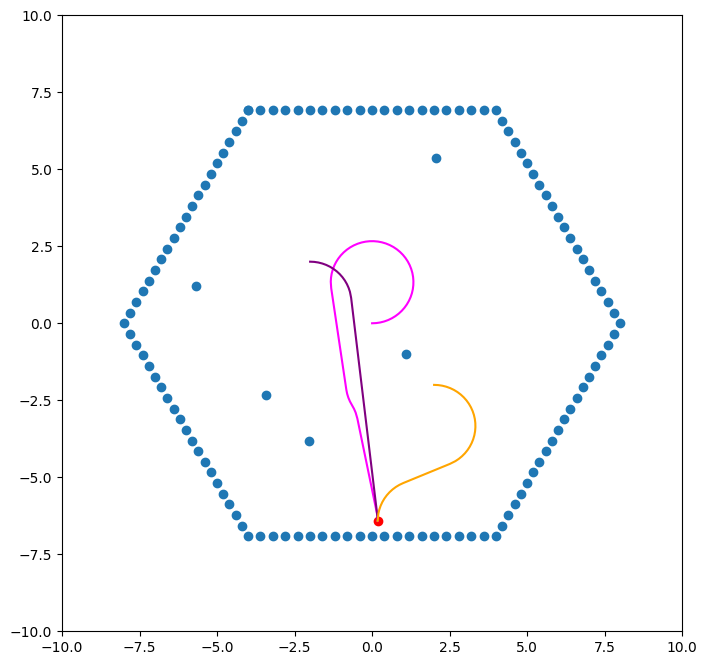

In [25]:
plt.figure(figsize=(8, 8))
plt.xlim(-10, 10)
plt.ylim(-10, 10)

plt.scatter(obstacleList[...,0], obstacleList[...,1])
plt.scatter(goal[0],goal[1], color='red')
# path0
plt.plot([x for (x, y) in shelfino0_path], [y for (x, y) in shelfino0_path], color="fuchsia")
plt.plot([x for (x, y) in shelfino1_path], [y for (x, y) in shelfino1_path], color="purple")
plt.plot([x for (x, y) in shelfino2_path], [y for (x, y) in shelfino2_path], color="orange")
plt.show()